<a href="https://colab.research.google.com/github/Jeevetesh/Parameter-Optimization-102383041/blob/main/Assingment_Parameter_Optimization_102383041.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

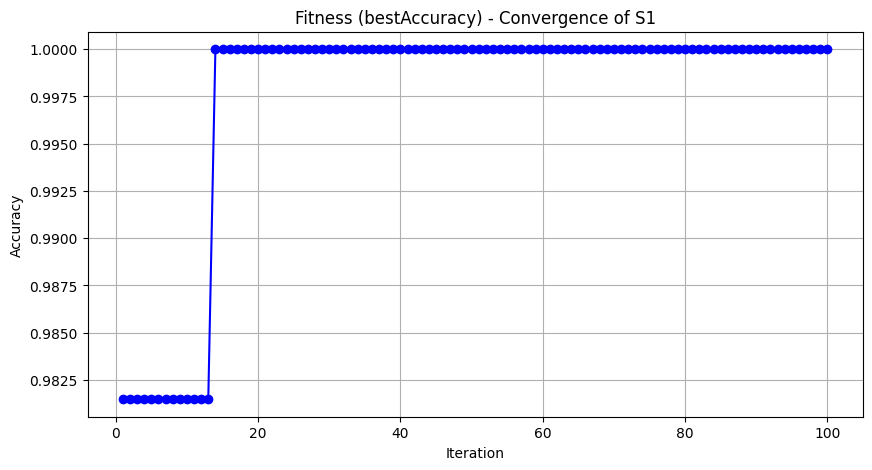

,Sample,Best Accuracy,Kernel,Nu
0,S1,1.000000,rbf,0.63
1,S2,1.000000,linear,0.33
2,S3,1.000000,poly,0.19
3,S4,1.000000,linear,0.39
4,S5,0.981481,linear,0.43
5,S6,1.000000,poly,0.07
6,S7,1.000000,rbf,0.25
7,S8,0.981481,linear,0.77
8,S9,1.000000,linear,0.15
9,S10,0.981481,rbf,0.61


In [6]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import NuSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import random

# Load a multi-class dataset from UCI (Wine Dataset)
data = datasets.load_wine()
X = data.data
y = data.target

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Store results for all 10 samples
results = []
all_convergence = []

# Define search space
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
nu_values = np.linspace(0.01, 0.99, 50)

# Run optimization for 10 samples
for sample_num in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=sample_num)

    best_accuracy = 0
    best_params = {}
    accuracy_progression = []

    for iteration in range(1, 101):
        kernel = random.choice(kernels)
        nu = round(random.choice(nu_values), 2)

        try:
            model = NuSVC(kernel=kernel, nu=nu)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred)

            if acc > best_accuracy:
                best_accuracy = acc
                best_params = {'kernel': kernel, 'nu': nu}
        except:
            continue  # skip invalid parameters

        accuracy_progression.append(best_accuracy)

    # Pad if fewer than 100 entries
    while len(accuracy_progression) < 100:
        accuracy_progression.append(best_accuracy)

    all_convergence.append(accuracy_progression)
    results.append({
        'Sample': f'S{sample_num}',
        'Best Accuracy': best_accuracy,
        'Best Parameters': best_params
    })

# Convert results to DataFrame
df_results = pd.DataFrame(results)
df_results['Kernel'] = df_results['Best Parameters'].apply(lambda x: x.get('kernel', 'N/A'))
df_results['Nu'] = df_results['Best Parameters'].apply(lambda x: x.get('nu', 'N/A'))
df_results.drop(columns=['Best Parameters'], inplace=True)

# Save result table
df_results.to_csv('optimized_svm_results.csv', index=False)

# Plot convergence graph for best sample
max_index = df_results['Best Accuracy'].idxmax()
plt.figure(figsize=(10,5))
plt.plot(range(1, 101), all_convergence[max_index], marker='o', linestyle='-', color='blue')
plt.title(f"Fitness (bestAccuracy) - Convergence of {df_results.loc[max_index, 'Sample']}")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.grid(True)
plt.savefig("convergence_plot_best_svm.png")
plt.show()

# Display final result table
df_results
